#  Add the Required Libraries


In [1]:
import pandas as pd
import numpy as np
import pickle
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle
from xgboost import XGBClassifier



#  Set random seed


In [2]:
np.random.seed(500)

#  Add the Dataset


In [3]:
Corpus = pd.read_csv('ldaTlB.csv')
Corpus = shuffle(Corpus)
Corpus

,score,text,Topics
993,1,dati dd marcos apocalypse dilawan lang ...,Political stance
1052,1,actually dilawan doesnt stick anymore ...,Political stance
369,1,yun sakit ulo nyo kasi survey dilawan ...,Election
359,1,thief pala proyekto tapos kayong dilaw...,Election
722,1,happened yolo rustyhairdontcare graduation...,Filipino Political News
...,...,...,...
287,1,chdmngo time blinded lie marcoses maha...,Election
957,1,oust duterte macy hahaha jk unless,Political stance
273,1,im planning come home february 2022 c...,Government Policies
951,1,seokjin bought rm bike bike sold bts w...,Political stance


In [4]:
Corpus['Topics'].value_counts()

Political stance           280
Election                   280
Filipino Political News    280
President                  280
Government Policies        280
Name: Topics, dtype: int64

In [5]:
print(Corpus.head())


      score                                               text  \
993       1   dati  dd  marcos  apocalypse  dilawan  lang  ...   
1052      1     actually  dilawan  doesnt  stick  anymore  ...   
369       1   yun  sakit  ulo  nyo  kasi  survey  dilawan  ...   
359       1     thief  pala  proyekto  tapos  kayong  dilaw...   
722       1   happened  yolo  rustyhairdontcare  graduation...   

                       Topics  
993          Political stance  
1052         Political stance  
369                  Election  
359                  Election  
722   Filipino Political News  


# Prepare Train and Test Data sets

In [6]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text'],Corpus['Topics'],test_size=0.3,random_state=1)


In [7]:
print (Test_Y)

549                    Election
1210                  President
1338                  President
833     Filipino Political News
99          Government Policies
                 ...           
580     Filipino Political News
808     Filipino Political News
1076           Political stance
679     Filipino Political News
1275                  President
Name: Topics, Length: 420, dtype: object


# Encoding

In [8]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
 
print (Test_Y)

[0 4 4 1 2 3 1 0 1 4 1 2 4 4 1 2 4 1 0 3 3 1 2 3 2 0 3 1 1 1 0 3 1 3 1 2 1
 1 0 4 0 4 2 0 0 0 3 3 1 3 4 2 0 0 1 3 0 4 2 0 2 4 0 0 4 2 2 1 0 1 4 1 4 1
 0 1 2 4 3 4 4 0 0 1 0 1 0 1 2 0 3 2 3 2 2 1 2 2 1 4 3 0 4 1 0 0 4 4 0 3 0
 0 2 0 2 0 3 3 3 4 4 3 3 2 0 4 2 4 0 2 3 0 2 2 0 2 3 1 4 0 0 2 1 4 4 3 4 3
 2 0 1 1 1 4 0 0 2 3 0 1 0 2 4 0 4 0 2 2 1 3 3 0 2 1 4 3 1 3 1 1 1 1 1 3 1
 2 1 0 0 2 4 3 1 0 2 1 3 4 4 2 4 3 2 2 2 3 1 2 2 0 4 0 2 3 0 4 3 4 1 3 1 3
 1 2 0 3 4 1 0 1 1 1 1 1 1 1 4 3 4 2 1 1 0 4 3 4 4 2 1 2 3 3 1 1 1 0 0 1 2
 0 0 0 1 4 4 2 4 0 4 2 4 3 4 3 0 0 1 3 3 0 1 0 3 0 0 2 4 2 0 1 0 4 4 1 1 3
 1 3 4 1 4 0 3 3 3 2 0 3 2 4 0 0 4 2 4 1 2 4 3 2 3 2 2 4 4 2 2 1 1 2 1 0 4
 0 4 0 1 4 0 2 3 0 4 2 4 4 4 3 3 4 2 3 3 0 4 3 1 4 3 2 2 0 1 0 2 1 3 2 2 1
 4 2 0 1 0 1 3 0 3 1 4 0 3 2 1 0 3 4 4 1 2 1 3 0 1 2 4 4 2 3 3 2 4 1 3 1 4
 1 0 3 3 3 2 2 2 1 1 3 1 4]


# Word Vectorization

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

Tfidf_vect = TfidfVectorizer(max_features=None)
Tfidf_vect.fit(Corpus['text'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)


In [10]:
print(Tfidf_vect.vocabulary_)


{'dati': 1191, 'dd': 1208, 'marcos': 3464, 'apocalypse': 355, 'dilawan': 1346, 'lang': 2971, 'iiwasan': 2354, 'mo': 3628, 'dumagdag': 1466, 'cquiao': 1110, 'supporter': 5618, 'actually': 173, 'doesnt': 1424, 'stick': 5538, 'anymore': 342, 'durog': 1482, 'yun': 6393, 'sakit': 5163, 'ulo': 6046, 'nyo': 4119, 'kasi': 2757, 'survey': 5629, 'number': 4105, 'bbm': 600, 'uubra': 6148, 'yung': 6394, 'nung': 4110, '2016': 35, 'never': 3985, 'talaga': 5689, 'kayu': 2791, 'lalo': 2961, 'nat': 3936, 'leni': 3030, 'pala': 4349, 'pam': 4369, 'bato': 585, 'neveragain': 3986, 'thief': 5816, 'proyekto': 4819, 'tapos': 5732, 'kayong': 2790, 'hero': 2201, 'ambag': 280, 'lipunan': 3092, 'happened': 2142, 'yolo': 6377, 'rustyhairdontcare': 5129, 'graduation': 2017, 'finally': 1767, 'itsaboy': 2570, 'feelingblessed': 1744, 'oustduterte': 4210, 'lol': 3118, 'significant': 5362, 'phillipines': 4562, 'government': 2008, 'particularly': 4465, 'given': 1970, 'president': 4746, 'rodrigo': 5107, 'duterte': 1486, '

In [11]:
print(Train_X_Tfidf)

  (0, 5631)	0.4040808320486083
  (0, 5462)	0.38238523623186926
  (0, 4780)	0.31796315202620906
  (0, 4606)	0.38238523623186926
  (0, 4582)	0.2465300176342511
  (0, 4206)	0.2047267147201093
  (0, 3941)	0.25742417487070046
  (0, 3194)	0.4040808320486083
  (0, 1486)	0.11427654832770637
  (0, 1174)	0.3128633022563893
  (1, 5768)	0.3925748948156023
  (1, 4101)	0.4148486267453402
  (1, 3629)	0.4148486267453402
  (1, 2151)	0.4148486267453402
  (1, 1346)	0.1246222639069644
  (1, 1344)	0.4148486267453402
  (1, 1154)	0.3767714305109179
  (2, 4210)	0.3912799605206338
  (2, 3671)	0.9202716949330623
  (3, 6095)	0.24568367318490456
  (3, 5450)	0.2539457027698621
  (3, 5072)	0.24568367318490456
  (3, 4971)	0.19082633817240116
  (3, 4798)	0.24568367318490456
  (3, 4793)	0.24568367318490456
  :	:
  (977, 199)	0.1814273322471738
  (977, 183)	0.14828880839919867
  (978, 4210)	1.0
  (979, 6322)	0.18376415398211124
  (979, 6194)	0.22799152673535558
  (979, 5084)	0.30906290135865294
  (979, 5012)	0.24092720

# Support Vector Machine

In [12]:
from sklearn.model_selection import GridSearchCV
grid_param = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid','linear']}

SVM = GridSearchCV(svm.SVC(), grid_param, refit=True, verbose=2)

In [13]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
#SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.1s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.1s
[CV] END ...................

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.1s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.1s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.1s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C

In [14]:
metrics.accuracy_score( Test_Y,predictions_SVM)

0.7071428571428572

In [15]:
print(classification_report(predictions_SVM, Test_Y))

              precision    recall  f1-score   support

           0       0.63      0.69      0.66        80
           1       0.81      0.81      0.81        94
           2       0.76      0.82      0.79        74
           3       0.69      0.64      0.66        83
           4       0.63      0.58      0.61        89

    accuracy                           0.71       420
   macro avg       0.71      0.71      0.71       420
weighted avg       0.71      0.71      0.71       420



In [16]:
print(Test_X)

549      sana  infographics  summary  u  want  know  m...
1210     yes  syang  manalo  election  die  hard  fan ...
1338     hope  vp  leni  chooses  fight  win  lose  fu...
833                                  neveragain  dilawan 
99       duterte  warns  senate  extract  govt  offici...
                              ...                        
580        thats  truth  g  toengi  caroline  kennedy ...
808                                  neveragain  dilawan 
1076     nag  nakaw  marcos  bansa  hinde  pakulong  c...
679      wala  nang  magandang  umaga  sistema  natin ...
1275     kasabay  paggunita  masahol  bata  militar  n...
Name: text, Length: 420, dtype: object


In [17]:
print(Test_Y)

[0 4 4 1 2 3 1 0 1 4 1 2 4 4 1 2 4 1 0 3 3 1 2 3 2 0 3 1 1 1 0 3 1 3 1 2 1
 1 0 4 0 4 2 0 0 0 3 3 1 3 4 2 0 0 1 3 0 4 2 0 2 4 0 0 4 2 2 1 0 1 4 1 4 1
 0 1 2 4 3 4 4 0 0 1 0 1 0 1 2 0 3 2 3 2 2 1 2 2 1 4 3 0 4 1 0 0 4 4 0 3 0
 0 2 0 2 0 3 3 3 4 4 3 3 2 0 4 2 4 0 2 3 0 2 2 0 2 3 1 4 0 0 2 1 4 4 3 4 3
 2 0 1 1 1 4 0 0 2 3 0 1 0 2 4 0 4 0 2 2 1 3 3 0 2 1 4 3 1 3 1 1 1 1 1 3 1
 2 1 0 0 2 4 3 1 0 2 1 3 4 4 2 4 3 2 2 2 3 1 2 2 0 4 0 2 3 0 4 3 4 1 3 1 3
 1 2 0 3 4 1 0 1 1 1 1 1 1 1 4 3 4 2 1 1 0 4 3 4 4 2 1 2 3 3 1 1 1 0 0 1 2
 0 0 0 1 4 4 2 4 0 4 2 4 3 4 3 0 0 1 3 3 0 1 0 3 0 0 2 4 2 0 1 0 4 4 1 1 3
 1 3 4 1 4 0 3 3 3 2 0 3 2 4 0 0 4 2 4 1 2 4 3 2 3 2 2 4 4 2 2 1 1 2 1 0 4
 0 4 0 1 4 0 2 3 0 4 2 4 4 4 3 3 4 2 3 3 0 4 3 1 4 3 2 2 0 1 0 2 1 3 2 2 1
 4 2 0 1 0 1 3 0 3 1 4 0 3 2 1 0 3 4 4 1 2 1 3 0 1 2 4 4 2 3 3 2 4 1 3 1 4
 1 0 3 3 3 2 2 2 1 1 3 1 4]


In [18]:
print (predictions_SVM )

[0 4 0 1 2 3 3 3 1 4 1 3 1 2 1 2 4 1 0 4 3 4 2 3 2 0 3 1 4 1 3 3 1 3 1 4 4
 1 0 4 3 1 2 0 0 0 3 3 1 3 3 2 0 0 1 3 4 4 2 0 3 2 2 3 0 2 2 1 0 1 3 4 4 1
 0 1 4 4 3 3 4 0 0 1 1 1 2 1 2 0 3 2 3 2 2 1 2 2 0 4 3 4 2 1 0 0 3 4 2 1 0
 0 2 0 2 0 3 3 3 0 4 3 2 1 0 4 2 4 4 3 3 1 4 0 0 2 3 1 4 4 0 2 1 4 4 3 3 3
 2 0 1 1 3 4 2 4 2 0 0 1 0 2 3 1 4 2 2 2 1 3 3 0 2 1 4 0 1 3 1 1 1 1 1 0 1
 2 1 3 0 2 3 3 1 0 2 1 4 4 4 2 4 4 0 0 2 3 1 3 4 0 0 0 0 1 0 4 1 4 4 3 1 3
 1 2 0 4 3 1 3 4 1 1 0 1 1 1 4 0 0 2 3 1 0 4 4 4 4 2 1 2 3 0 1 1 1 0 4 1 2
 0 4 3 1 4 4 2 3 0 2 3 1 1 4 4 4 2 1 3 3 2 3 0 3 0 0 2 4 2 0 1 0 4 0 1 0 4
 1 3 4 1 4 1 3 3 3 2 0 3 2 0 0 0 4 2 4 3 2 3 3 4 3 3 2 4 0 2 2 1 4 4 1 2 4
 0 0 0 1 4 0 0 1 0 4 2 0 3 4 4 3 4 2 0 3 0 4 3 1 3 3 2 2 0 1 4 2 1 3 2 1 4
 4 2 4 1 1 4 3 0 3 1 4 0 3 2 1 4 1 4 4 1 2 1 1 4 1 2 4 0 2 3 1 2 4 1 3 1 4
 4 0 3 3 3 2 2 2 1 1 4 1 4]


In [19]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(predictions_SVM, Test_Y)
print(cohen_score)

0.6336040285116493


# XGB

In [20]:
XGB = XGBClassifier()


In [21]:
from sklearn.model_selection import GridSearchCV

xgb = GridSearchCV(XGB,{'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, 
                    verbose=1, 
                    scoring='neg_log_loss')



In [22]:
xgb.fit(Train_X_Tfidf,Train_Y)
# make predictions for test data
pred_xgb = xgb.predict(Test_X_Tfidf)
# evaluate predictions

print("XGB Accuracy Score -> ",accuracy_score(pred_xgb, Test_Y)*100)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[12:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[12:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB Accuracy Score ->  70.23809523809523


In [23]:
metrics.accuracy_score( Test_Y,pred_xgb)

0.7023809523809523

In [24]:
print(classification_report(pred_xgb, Test_Y))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68        72
           1       0.85      0.79      0.82       101
           2       0.69      0.70      0.69        79
           3       0.77      0.66      0.71        90
           4       0.57      0.60      0.59        78

    accuracy                           0.70       420
   macro avg       0.70      0.70      0.70       420
weighted avg       0.71      0.70      0.70       420



In [25]:
print (pred_xgb) 

[0 2 0 1 2 3 1 0 1 4 1 3 1 2 1 0 4 4 2 3 3 4 2 3 2 0 3 1 4 3 0 3 1 3 1 3 1
 1 0 1 3 1 2 0 0 0 3 0 0 3 4 2 0 0 1 3 4 4 2 0 3 2 2 2 4 2 2 1 0 1 3 1 4 1
 0 1 2 4 3 3 4 0 0 1 4 1 3 1 4 0 2 2 4 2 2 1 2 2 0 4 3 0 2 1 0 4 3 4 3 1 4
 0 2 3 2 0 3 3 3 0 4 3 3 1 0 4 2 4 0 3 3 1 2 0 0 0 3 1 4 4 0 2 1 4 4 3 3 3
 2 0 1 3 1 2 0 2 2 3 4 1 0 2 3 1 4 0 2 2 1 3 3 0 2 1 4 3 1 3 1 1 1 1 1 3 1
 2 1 3 0 2 4 2 1 0 2 1 4 2 4 2 4 3 0 0 2 3 1 1 4 0 2 0 2 1 0 4 3 2 3 2 1 3
 1 2 3 4 3 1 3 4 1 1 0 1 1 1 2 0 4 3 1 1 0 4 4 4 2 2 1 2 3 3 1 1 1 0 0 1 2
 0 3 0 1 4 4 4 0 0 2 4 1 1 4 3 3 2 4 3 3 0 1 0 3 0 3 2 4 2 0 1 0 4 3 1 1 3
 1 3 4 1 4 1 3 3 3 2 2 3 2 4 0 0 4 1 0 1 4 2 3 4 3 0 2 4 0 1 2 1 4 2 1 2 4
 0 2 3 1 4 0 0 1 4 4 2 3 3 4 4 3 4 2 3 3 0 3 3 1 3 3 2 2 0 1 4 4 1 3 3 1 4
 4 2 0 1 1 4 3 0 1 1 2 0 3 2 1 4 1 4 4 1 2 1 1 4 1 2 4 4 2 3 1 2 0 1 3 1 4
 1 4 3 3 3 2 2 2 1 1 3 1 4]


# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression()
LG.fit(Train_X_Tfidf,Train_Y)
# make predictions for test data
pred_LG = LG.predict(Test_X_Tfidf)
# evaluate predictions

print("Logistic Regression -> ",accuracy_score(pred_LG, Test_Y)*100)

Logistic Regression ->  71.42857142857143


In [27]:
metrics.accuracy_score( pred_LG, Test_Y)

0.7142857142857143

In [28]:
print(classification_report(pred_LG, Test_Y))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        73
           1       0.81      0.81      0.81        94
           2       0.76      0.81      0.79        75
           3       0.78      0.65      0.71        92
           4       0.63      0.60      0.62        86

    accuracy                           0.71       420
   macro avg       0.71      0.72      0.71       420
weighted avg       0.72      0.71      0.71       420



# VALIDATION

SVM

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SVM, Test_X_Tfidf, Test_Y, cv=10,  scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1

[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ....................C=10, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=

[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=100, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C

[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .....................C=10, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=100, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ..........................C=1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .......................C=1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=100, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=100, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=100, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C

[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END .................C=

[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=10, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................

[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END .........................C=10, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................

[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=100, gamma=0.1, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=100, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................

[CV] END ......................C=1, gamma=0.001, kernel=poly; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=1, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..........................C=10, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ...................

[CV] END .....................C=100, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=100, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=100, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=100, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

XGB

In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(XGB, Test_X_Tfidf, Test_Y, cv=10,  scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:37:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.58 (+/- 0.13)


Logistic Regression

In [31]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LG, Test_X_Tfidf, Test_Y, cv=10,  scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.65 (+/- 0.13)


# Export the results

In [32]:
df = pd.DataFrame(Test_X)
df0 = pd.DataFrame(Test_Y)
df1 = pd.DataFrame(predictions_SVM)
df2 = pd.DataFrame(pred_xgb)
df3 = pd.DataFrame(pred_LG)

In [33]:
df = df.reset_index()
df

,index,text
0,549,sana infographics summary u want know m...
1,1210,yes syang manalo election die hard fan ...
2,1338,hope vp leni chooses fight win lose fu...
3,833,neveragain dilawan
4,99,duterte warns senate extract govt offici...
...,...,...
415,580,thats truth g toengi caroline kennedy ...
416,808,neveragain dilawan
417,1076,nag nakaw marcos bansa hinde pakulong c...
418,679,wala nang magandang umaga sistema natin ...


In [34]:
df1

,0
0,0
1,4
2,0
3,1
4,2
...,...
415,1
416,1
417,4
418,1


In [35]:
df2

,0
0,0
1,2
2,0
3,1
4,2
...,...
415,1
416,1
417,3
418,1


In [36]:
df3

,0
0,0
1,4
2,0
3,1
4,2
...,...
415,1
416,1
417,4
418,1


In [37]:
pred_combined = pd.DataFrame()
pred_combined['Tweets'] = df['text']
pred_combined['True Value'] = df0[0]
pred_combined['SVM'] = df1[0]
pred_combined['XGB'] = df2[0]
pred_combined['LG'] = df3[0]
pred_combined

,Tweets,True Value,SVM,XGB,LG
0,sana infographics summary u want know m...,0,0,0,0
1,yes syang manalo election die hard fan ...,4,4,2,4
2,hope vp leni chooses fight win lose fu...,4,0,0,0
3,neveragain dilawan,1,1,1,1
4,duterte warns senate extract govt offici...,2,2,2,2
...,...,...,...,...,...
415,thats truth g toengi caroline kennedy ...,1,1,1,1
416,neveragain dilawan,1,1,1,1
417,nag nakaw marcos bansa hinde pakulong c...,3,4,3,4
418,wala nang magandang umaga sistema natin ...,1,1,1,1


In [38]:
pred_combined.to_csv("Predictions.csv", index ="False")

# Confusion Matrix

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

 SVM

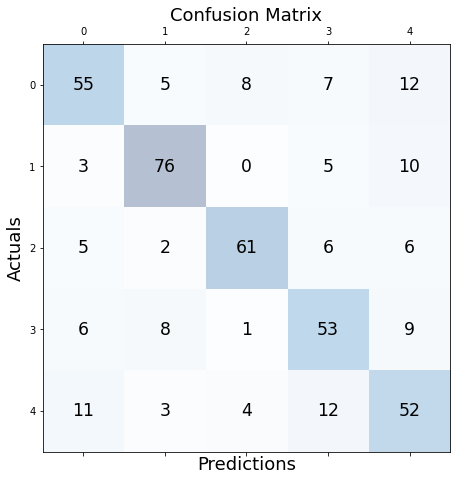

In [40]:
conf_matrix1 = confusion_matrix(y_true= Test_Y, y_pred=predictions_SVM)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix1.shape[0]):
    for j in range(conf_matrix1.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix1[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
 

XGB

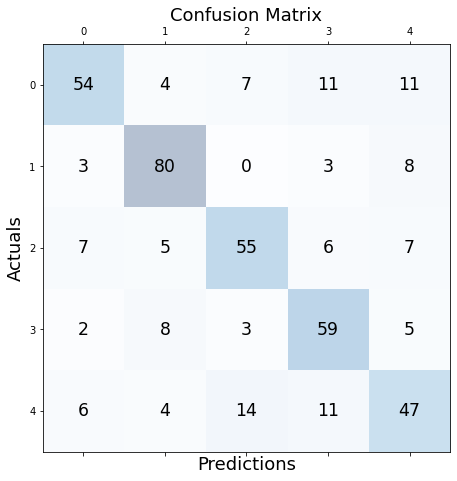

In [41]:
conf_matrix2 = confusion_matrix(y_true= Test_Y, y_pred=pred_xgb)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix2.shape[0]):
    for j in range(conf_matrix2.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix2[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

Logistic Regression

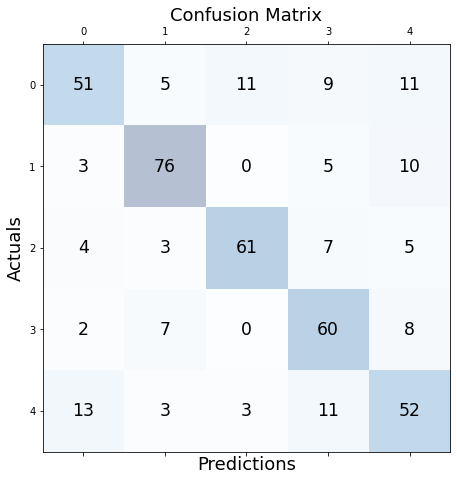

In [42]:
conf_matrix3 = confusion_matrix(y_true= Test_Y, y_pred=pred_LG)
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix3, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix3.shape[0]):
    for j in range(conf_matrix3.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix3[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# save model

In [43]:
with open('model_LogReg','wb') as f:
    pickle.dump(LG,f)